<div id="bg" style="height:150px;width:150px; float=left; clear=true; margin-left:38%">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/IE_University_logo.svg/1200px-IE_University_logo.svg.png" style="width:100%; height:100%;">
</div> 
 


## <span style="color:black; margin-left:26%; font-size:16pt;">Professor: Angel Castellanos Gonzalez</span>
## <span style="color:#4286f4; margin-left:20%; font-size:22pt;">Assignment #1: Fake News Detection</span>

<img src="https://www.celebros.com/media/k2/items/cache/e0a70f72bdae9885bfc32d7cd19a26a1_L.jpg" style="width:30%; height:30%; margin-left:30%">
<br>
<br>
<br>

<h2 style="margin-left:20%">Team: Jorge Alarcon, Cecilia de Brun, Hani Eid

# <span style="color:#4286f4">Objective:

### The objective of this assignment is the detection of fake news through the use classification methodologies as well as the NLP tools.

# <span style="color:#4286f4">1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import nltk
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, ShuffleSplit
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer # or LancasterStemmer, RegexpStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import seaborn as sns
import string
from sklearn import preprocessing 
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neural_network import MLPClassifier  
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler  
from matplotlib.pyplot import *
from sklearn.feature_extraction.text import TfidfVectorizer
from pylab import *

In [2]:
warnings.filterwarnings('ignore')

# <span style="color:#4286f4">2. Loading the Datasets

In [3]:
train = pd.read_csv('fake_or_real_news_training.csv')
test = pd.read_csv('fake_or_real_news_test.csv')

In [4]:
train.head()

,ID,title,text,label,X1,X2
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN


# <span style="color:#4286f4">3. Data pre-procesing
### <ul><li>There's a problem with the data: For some rows, part of the 'text' and/or 'title' data is on columns 'X1' and 'X2'.<li>We have to switch to the correct column, the data from X1 and X2 columns.

### <span style="color:#4286f4">3.1 We have to switch to the correct column the data from X1 and X2 columns

In [5]:
train_2 = train[(train.label == "REAL")|(train.label == "FAKE")]
X1_switch = train[(train.X1 == "REAL")|(train.X1 == "FAKE")]
X2_switch = train[(train.X2 == "REAL")|(train.X2 == "FAKE")]

### <span style="color:#4286f4">3.2 Lets merge the column label to text and switch X1 to label

In [6]:
X1_switch['text'] = X1_switch.text + ' ' +X1_switch.label
X1_switch['label'] = X1_switch.X1
X1_switch.head()

,ID,title,text,label,X1,X2
192,599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South Election Day: No ...,REAL,REAL,NaN
308,10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue? Who rode it ...,FAKE,FAKE,NaN
382,356,Black Hawk crashes off Florida,human remains found (CNN) Thick fog forced au...,REAL,REAL,NaN
660,2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating (CNN) Aerial bombardments ...,REAL,REAL,NaN
889,3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning A member of Al Qaeda...,REAL,REAL,NaN


### <span style="color:#4286f4">3.3 Same for X2

In [7]:
X2_switch['text'] = X2_switch.text + ' ' +X2_switch.label
X2_switch['label'] = X2_switch.X2
X2_switch.head()

,ID,title,text,label,X1,X2
2184,9,Planned Parenthood’s lobbying effort,pay raises for federal workers and the futur...,REAL,PLANNED PARENTHOOD’S LOBBYING GETS AGGRESSIVE....,REAL
3537,6268,Chart Of The Day: Since 2009—–Recovery For The 5%,Stagnation for the 95% Chart Of The Day: Sinc...,FAKE,Stagnation for the 95%,FAKE


### <span style="color:#4286f4">3.4 Now we merge the created dataframes
### <ul><li>We create the variable 'both' that merges 'title' and 'text' columns and will be used as the input for our model

In [8]:
all_switch = pd.concat([X1_switch, X2_switch])
train = pd.concat([train_2, all_switch])
train['both'] = train.title + ' ' + train.text
train = train.drop(['X1', 'X2'], axis =1)
train.head()

,ID,title,text,label,both
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


### Data Processing on the Test Data:

In [9]:
test['both'] = test.title + ' ' + test.text
test.head()

,ID,title,text,both
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...,September New Homes Sales Rise——-Back To 1992 ...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...,Why The Obamacare Doomsday Cult Can't Admit It...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...,"Sanders, Cruz resist pressure after NY losses,..."
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...,Surviving escaped prisoner likely fatigued and...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...,Clinton and Sanders neck and neck in Californi...


## <span style="color:#4286f4">4. Splitting Train/Test
  <h3><ol><li> We used these splitting data sets in our preliminary models and stages to check the performance.</li>
  <li> After that, we switched to Cross-Validation approach which better splits our training and validation data sets</li>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.both, train.label, test_size=0.3)
print("Train: " + str(len(X_train)) + "\nTest:  " + str(len(X_test)))

Train: 2799
Test:  1200


## <span style="color:#4286f4">5. Data Preprocessing, We define the below function that takes care of the following:

<h3> We create a function to preprocess our data, which removes special characters and stop words, and applies tokenization and stemming. We do this to remove the noise of the data and later be able to extract the relevant features.
<h3><ol><li>Tokenization</li>
        <li>Removing Special Characters</li>
        <li>Stemming the words, but we didin't use that in our Pipeline due to a lower accuracy and incorrect spellings</li>
        <li>Removing the Stop Words</li>

In [11]:
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
def clean_text(text, ):

    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text, characters=string.punctuation.replace('-', '')):
        tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(characters)))
        return ' '.join(filter(None, [pattern.sub('', t) for t in tokens]))

    def stem_text(text, stemmer=default_stemmer):
        tokens = tokenize_text(text)
        return ' '.join([stemmer.stem(t) for t in tokens])

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ') #strip whitespaes
    text = text.lower() #lowercase
    #text = stem_text(text) #stemming
    text = remove_special_characters(text) #remove punctuation and symbols
    text = remove_stopwords(text) #remove stopwords
    #text.strip(' ') # strip white spaces again?

    return text

In [12]:
train.both = train.both.apply(clean_text)

In [13]:
test.both = test.both.apply(clean_text)

## <span style="color:#4286f4">5. Fake Records

<h3>We analyze the fake records by vectorizing the documents with TF-IDF. The TF-IDF is used to determine the word importance in on the set and extract the relevant features that have a significant impact on whether the news is fake or real.

We will be using CountVectorizer and TfidfVectorizer in order to achieve this.


In [14]:
sum(train.label == "FAKE")

1991

## <span style="color:#4286f4">6. Modelling

### When we first start modelling, we used the splitted training and testing to fit and predict the labels, but when deciding and tuning the parameters we are using CV to have a better generalization of the model and not be biased towards a sample of data where we might sometimes get lucky when splitting the training set and the model would perfectly fit there. However, when predicting on unseen data AKA future/test data, we are most probably getting a much lower accuracy.

### Performing a TF-IDF Vectorizer on the merged column "both" with ngrams (1,2) on both Train and Test datasets

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

features = tfidf.fit_transform(train.both).toarray()
labels = train.label
features.shape

(3999, 50167)

In [16]:
features_test = tfidf.fit_transform(test.both).toarray()
features_test.shape

(2321, 29081)

## <span style="color:#4286f4">Naive Bayes
### Once we already have the relevant features, we will use Naive Bayes to compute the probability of the News being Fake. We will approach this by using Bernoulli and Multinomial models.

### <span style="color:#4286f4">6.1 Bernoulli NB
### What we will get by using the Bernoulli model is the fraction of documents that are fake and contain the terms found by the tf-idf. We will also reduce the amount of features by doing feature selection with the chi square.  
### <ul><li><span style="color:red">The accuracy of this model is around 83.42%

In [17]:
CV=10

In [18]:
bern_nb_pipe = Pipeline([
                      ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')),
                      ('chi2', SelectKBest(chi2, k=1260)),
                      ('bnb', BernoulliNB())])
#text_clf = text_clf.fit(X_train, y_train)
#predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test)
accuracy_BNB = cross_val_score(bern_nb_pipe, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_BNB

array([ 0.82543641,  0.8125    ,  0.8075    ,  0.8275    ,  0.8125    ,
        0.8575    ,  0.8675    ,  0.835     ,  0.8245614 ,  0.87218045])

In [19]:
accuracy_BNB.mean()

0.83421782636141484

### <span style="color:#4286f4">6.2 Multinomial NB

### The multinomial model estimates the fraction of tokens or fraction of positions in documents being fake that contain the selected term.

### Bernoulli model uses binary occurrence information, ignoring the number of occurrences, whereas the multinomial model keeps track of multiple occurrences. As a result, the Bernoulli model typically makes many mistakes when classifying long documents. 
### In this sense, Multinomial is more powerfull since in the case of fake or real news, a word might not be an indication of its falsehood, but the number of times it is repeated.

### <ul><li><span style="color:red">Indeed it's better, obtaining an accuracy of 89%

In [20]:
multi_nb_pipe = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('chi2', SelectKBest(chi2, k=1500)),
                      ('bnb', MultinomialNB(fit_prior=False))])
#text_clf = text_clf.fit(X_train, y_train)
#predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test)
accuracy_MNB = cross_val_score(multi_nb_pipe, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_MNB

array([ 0.88528678,  0.8875    ,  0.8825    ,  0.8975    ,  0.8975    ,
        0.91      ,  0.935     ,  0.8925    ,  0.87468672,  0.87218045])

### <span style="color:#4286f4">6.3 SVM - with Stochastic Gradient Descent

### While with Naive Bayes we trated our features as independent, with the SVM we will look for interactions between them to a certain degree. So if we have interactions, an SVM will be better at capturing those.

### The SGD treats the data in batches and performs a gradient descent aiming to minimize expected loss with respect to the sample distribution, assuming that the examples are iid samples of that distribution.

### <ul><li><span style="color:red"> Accuracy: 94.3%

In [21]:
gradient_descent_1 = Pipeline([
                      ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))),
                      ('clf', SGDClassifier())])
#gradient_descent_1 = gradient_descent_1.fit(X_train, y_train)
#predicted_svm = gradient_descent_1.predict(X_test)
#accuracy = np.mean(predicted_svm == y_test) * 100
#print('SVM-SGD Model Accuracy: ' + str(round(accuracy,2)) + ' %')

accuracy_svm_sgd = cross_val_score(gradient_descent_1, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_svm_sgd

array([ 0.95012469,  0.92      ,  0.96      ,  0.9375    ,  0.94      ,
        0.95      ,  0.9575    ,  0.9425    ,  0.9273183 ,  0.93734336])

In [22]:
accuracy_svm_sgd.mean()

0.94222863424146408

### <span style="color:#4286f4">6.4 SVM - with Stochastic Gradient Descent and Chi-Squared

### Adding the SelectKBest which uses Chi-Squared to select the top features by tuning K

### <ul><li><span style="color:red"> Accuracy: 94.27%

In [23]:
gradient_descent_2 = Pipeline([#('vect', CountVectorizer()),
                      ('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))),
                      ('chi2', SelectKBest(chi2, k=28000)),
                      ('clf', SGDClassifier())])
#gradient_descent_2 = gradient_descent_2.fit(X_train, y_train)
#predicted_svm = gradient_descent_2.predict(X_test)
#accuracy = np.mean(predicted_svm == y_test) * 100
#print('SVC Model Accuracy: ' + str(round(accuracy,2)) + ' %')
accuracy_svm_sgd_chi = cross_val_score(gradient_descent_2, train.both, train.label, scoring='accuracy', cv=5)
accuracy_svm_sgd_chi

array([ 0.95131086,  0.9425    ,  0.9475    ,  0.94242804,  0.92365457])

In [24]:
accuracy_svm_sgd_chi.mean()

0.94147869293545772

### <span style="color:#4286f4">6.5 SVM - with LinearSVC

### <ul><li><span style="color:red"> Accuracy: 94.39%

In [25]:
linear_svc_1 = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))),
                      ('clf', LinearSVC())])


accuracy_svm_svc = cross_val_score(linear_svc_1, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_svm_svc

array([ 0.94513716,  0.9325    ,  0.955     ,  0.94      ,  0.945     ,
        0.95      ,  0.955     ,  0.9425    ,  0.93233083,  0.94235589])

In [26]:
accuracy_svm_svc.mean()

0.94398238738992135

### <span style="color:#4286f4">6.6 SVM - with LinearSVC + Chi-Squared

### <ul><li><span style="color:red"> Accuracy: 94.54%

In [27]:
linear_svc_2 = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))),
                      ('chi2', SelectKBest(chi2, k=30000)),
                      ('clf', LinearSVC())])
accuracy_svm_svc_chi = cross_val_score(linear_svc_2, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_svm_svc_chi

array([ 0.94763092,  0.935     ,  0.965     ,  0.9425    ,  0.94      ,
        0.9475    ,  0.9575    ,  0.945     ,  0.93483709,  0.93984962])

In [28]:
accuracy_svm_svc_chi.mean()

0.94548176394852468

### <span style="color:#4286f4">6.7 Logistic Regression

### <ul><li><span style="color:red"> Accuracy: 92.39%

In [29]:
logistic_pipe = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))),
                      ('chi2', SelectKBest(chi2, k=30000)),
                      ('clf', LogisticRegression())])
accuracy_logistic = cross_val_score(logistic_pipe, train.both, train.label, scoring='accuracy', cv=CV)
accuracy_logistic

array([ 0.92518703,  0.9275    ,  0.9275    ,  0.925     ,  0.9175    ,
        0.935     ,  0.95      ,  0.91      ,  0.9197995 ,  0.9197995 ])

In [30]:
accuracy_logistic.mean()

0.92572860299126858

### <span style="color:#4286f4">6.8 Neural Nets - MLP Classifier

In [31]:
y = train.label
y = pd.DataFrame(y)
le = preprocessing.LabelEncoder()
y = le.fit_transform(train.label)

In [32]:
X = train.iloc[:, 4]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.20)  

### <span style="color:#4286f4"><u>Feature Scaling</u>

In [33]:
scaler = StandardScaler()  
scaler.fit(features)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### <span style="color:#4286f4"><u> Training and Predictions</u>

### We tried different solvers {‘lbfgs’, ‘sgd’, ‘adam’}, but 'lbfgs' which is an optimizer in the family of quasi-Newton methods gave us the best result

In [34]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, activation = 'relu')  
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [35]:
predictions = mlp.predict(X_test) 
np.mean(predictions == y_test)

0.90000000000000002

### <span style="color:#4286f4"><u> Evaluating the Algorithm</u>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test,predictions))  

             precision    recall  f1-score   support

          0       0.92      0.87      0.89       389
          1       0.88      0.93      0.91       411

avg / total       0.90      0.90      0.90       800



### <span style="color:#4286f4">7. Parameter Optimization:
### <ul><li>Grid Search with Linear SVC + Chi-Squared

In [37]:
#param_grid = {
#    'vect__max_df':[0.5, 0.75, 1.0],
#    'clf__C':[0.1,0.8,1.0]
#}

param_grid = {
    'tfidf__use_idf':(True,False),
    'tfidf__smooth_idf':(True,False),
     'clf__C': [0.1,0.8,1.0]
}

# do 3-fold cross validation for each of the 6 possible
# combinations of the parameter values above
grid = GridSearchCV(linear_svc_2, cv=10, param_grid=param_grid, n_jobs=-1)
grid.fit(train.both,train.label)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.945486 using {'clf__C': 0.8, 'tfidf__smooth_idf': True, 'tfidf__use_idf': True}


In [38]:
entries_2 = []
entries_2.append(("Multinomial-Naive Bayes", accuracy_MNB.mean()))
entries_2.append(("Bernulli-Naive Bayes", accuracy_BNB.mean()))
entries_2.append(("Logistic", accuracy_logistic.mean()))
entries_2.append(("SVM-Gradient-Descent", accuracy_svm_sgd.mean()))
entries_2.append(("SVM-Gradient-Descent + Chi-Squared", accuracy_svm_sgd_chi.mean()))
entries_2.append(("SVM-LinearSVC", accuracy_svm_svc.mean()))
entries_2.append(("SVM-LinearSVC + Chi-Squared", accuracy_svm_svc_chi.mean()))

pd.DataFrame(entries_2, columns=['Model', 'Accuracy']).sort_values(by=('Accuracy'), ascending=False)

,Model,Accuracy
6,SVM-LinearSVC + Chi-Squared,0.945482
5,SVM-LinearSVC,0.943982
3,SVM-Gradient-Descent,0.942229
4,SVM-Gradient-Descent + Chi-Squared,0.941479
2,Logistic,0.925729
0,Multinomial-Naive Bayes,0.893465
1,Bernulli-Naive Bayes,0.834218


## <span style="color:#4286f4">8. Different Approach 
### Looping between differnt models while performing CrossValidations then Plotting all the accuracies.
### However, here we dont have a pipeline. The variable used is "features" which is the TF-IDF transformation output we did before
### <span style="color:red"><ol><li> Linear SVC</li> <li> SGD Classifier</li><li> Multinomial Naive Bayes <li> Logistic Regression

In [45]:
models = [
    LinearSVC(),
    SGDClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

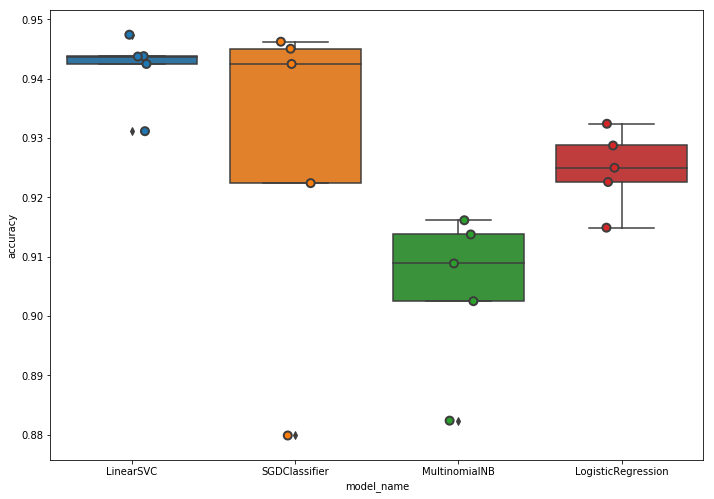

In [46]:
rcParams['figure.figsize'] = 11.7,8.27
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [49]:
Models = pd.DataFrame(entries, columns=['Model','CV-K', 'Accuracy'])
Models.Accuracy = Models.Accuracy*100
Models

,Model,CV-K,Accuracy
0,LinearSVC,0,94.382022
1,LinearSVC,1,94.375000
2,LinearSVC,2,94.250000
3,LinearSVC,3,94.743429
4,LinearSVC,4,93.116395
5,SGDClassifier,0,94.506866
6,SGDClassifier,1,94.250000
7,SGDClassifier,2,94.625000
8,SGDClassifier,3,92.240300
9,SGDClassifier,4,87.984981


In [48]:
pd.DataFrame(Models.groupby('Model').Accuracy.mean())

,Accuracy
Model,
LinearSVC,94.173369
LogisticRegression,92.473118
MultinomialNB,90.472241
SGDClassifier,92.721430


## <span style="color:#4286f4">9. Conclusion: We will make the prediction with the LinearSVC+Chi-Squared since it is the one with the better prediction accuracy

### 9.1 Predicting on Test Data using the best model: LinearSVC + Chi-Squared

In [43]:
test_model = linear_svc_2.fit(train.both, train.label)
test_predictions = test_model.predict(test.both)

In [44]:
submission = pd.DataFrame({
            "Tweet_id": test["ID"],
            "prediction": test_predictions
        },columns = ['Tweet_id', 'prediction'])
submission.to_csv("Assignment1-DJACHE.csv", index = False)